# _*Experiment with the Deutsch-Jozsa Algorithm in Aqua*_

This notebook demonstrates how to experiment with the `Deutsch-Jozsa` algorithm in `Qiskit Aqua`.

We first import all necessary modules.

In [1]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import DeutschJozsa
from qiskit.aqua.components.oracles import TruthTableOracle

The [Deutsch-Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch-Jozsa_algorithm) is explained in more detail in the corresponding notebook located in the directory `community/algorithms`. We can experiment with it in Aqua by feeding it oracles created using truth tables. For example, we can create a `TruthTableOracle` instance as follows.

In [2]:
bitstr = '11110000'
oracle = TruthTableOracle(bitstr)

As shown, the truthtable is specified with the `bitstr` containing values of all entries in the table. It has length $8$, so the corresponding truth table is of $3$ input bits. We can of course see that this truth table represents a `'balanced'` function as half of values are $1$ and the other half $0$.

It might seem like a moot point running Deutsch-Jozsa on a truthtable as the function outputs are literally listed as the truthtable's values. The intention is to create an oracle circuit whose groundtruth information is readily available to us but obviously not to the quantum Deutsch-Jozsa algorithm that is to act upon the oracle circuit. In more realistic situations, the oracle circuit would be provided as a blackbox to the algorihtm.

Above said, we can inspect the circuit corresponding to the function encoded in the `TruthTableOracle` instance.

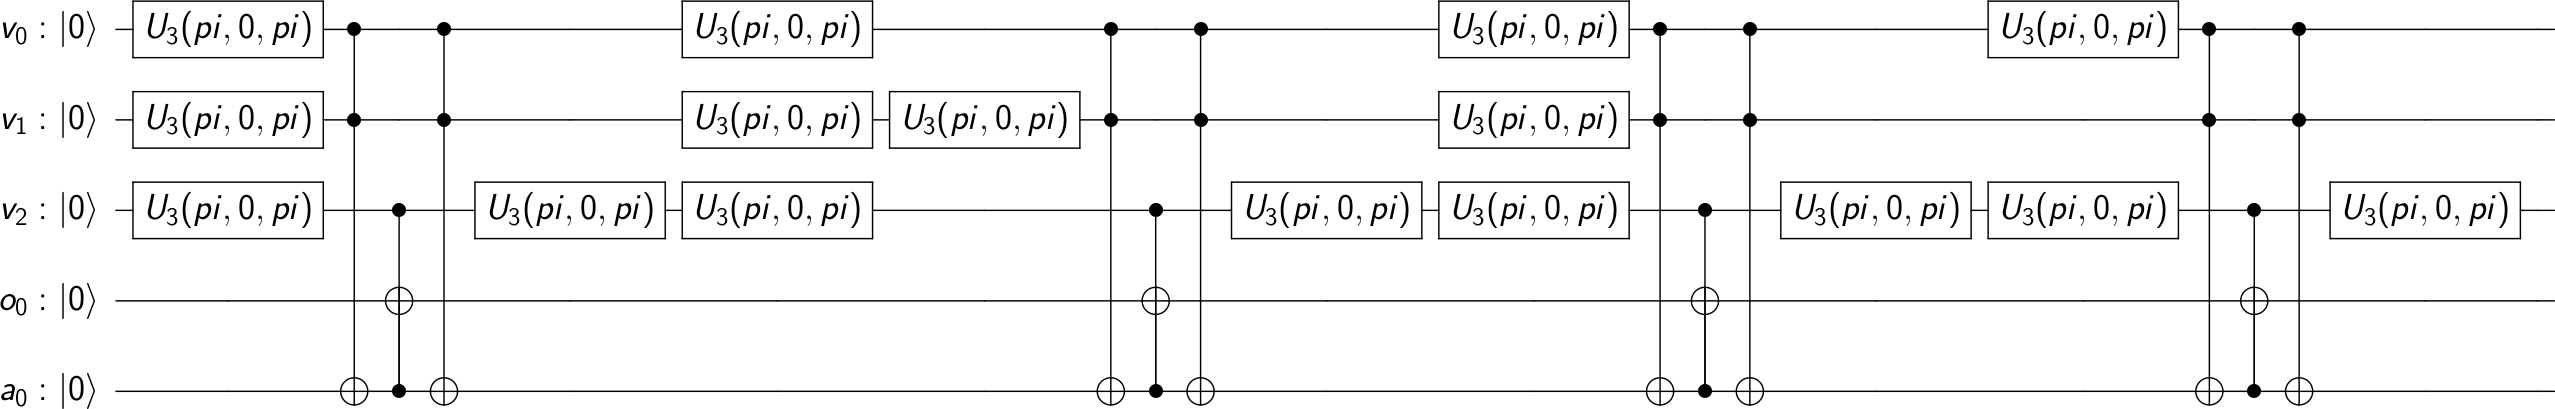

In [3]:
oracle.circuit.draw(output='latex')

As seen, the $v_i$'s correspond to the 3 input bits; the $o_0$ is the oracle's output qubit; the $a_0$ is an ancilla qubit.

Next we can simply create a `DeutschJozsa` instance using the oracle, and run it to check the result.

In [4]:
dj = DeutschJozsa(oracle)
backend = BasicAer.get_backend('qasm_simulator')
result = dj.run(QuantumInstance(backend, shots=1024))
print('The truth table {} represents a {} function.'.format(bitstr, result['result']))

The truth table 11110000 represents a balanced function.


The above step-by-step programatic approach can also be achieved by using a json configuration dictionary with the parameters for the algorithm and any other dependent objects it requires, as follows:

In [5]:
bitstr = '11110000'
params = {
    'problem': {
        'name': 'functionevaluation',
    },
    'algorithm': {
        'name': 'DeutschJozsa'
    },
    'oracle': {
        'name': 'TruthTableOracle',
        'bitmaps': [bitstr]
    },
    'backend': {
        'shots': 1024,
    },
}

result_dict = run_algorithm(params, backend=backend)
print('The truth table {} represents a {} function.'.format(bitstr, result_dict['result']))

The truth table 11110000 represents a balanced function.


We can of course quickly put together another example for a `'constant'` function, as follows.

In [6]:
bitstr = '1' * 16
oracle = TruthTableOracle(bitstr)
dj = DeutschJozsa(oracle)
backend = BasicAer.get_backend('qasm_simulator')
result = dj.run(QuantumInstance(backend, shots=1024))
print('The truth table {} represents a {} function.'.format(bitstr, result['result']))

The truth table 1111111111111111 represents a constant function.
